In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import plotly.express as ps 
from datetime import datetime

In [3]:
pwd = os.getcwd()
file_path= os.path.join(pwd ,'analysis_data.xlsx')
data = pd.read_excel(file_path)

#  RFM Analysis

In [4]:
comparision_date = data['transaction_date'].max()

In [5]:
data['recency'] = comparision_date - data['transaction_date'] 

In [6]:
frequency_data = data.groupby('customer_id')['transaction_date'].count().reset_index()

In [7]:
frequency_data.rename(columns={'transaction_date': 'Frequency'}, inplace=True)

In [8]:
data = pd.merge(data, frequency_data, on='customer_id')

In [9]:
monetary_data = data.groupby('customer_id')['list_price'].sum().reset_index()

In [10]:
monetary_data.rename(columns={'list_price': 'MonetaryValue'}, inplace=True)
data = pd.merge(data, monetary_data, on='customer_id')

# Calculate RFM scores and assign RFM segments

In [11]:
data['R_score'] = pd.qcut(data['recency'], q=4, labels=False) +1

In [12]:
data['F_score'] = pd.qcut(data['Frequency'], q=4, labels=False) +1
data['M_score'] = pd.qcut(data['MonetaryValue'], q=4, labels=False) +1

In [13]:
data['RFM_value'] = 100 * data['R_score']  + 10 * data['F_score'] + data['M_score']

In [14]:
data['RFM_score'] = pd.qcut(data['RFM_value'], q=4, labels=False) +1

In [15]:
segment_mapping = {
    '4': 'Platinum',
    '3': 'Gold',
    '2': 'Silver',
    '1': 'Brownz',
}

data['Customer_segment'] = data['RFM_score'].astype(str).map(segment_mapping)

In [16]:
#data.hist(figsize=(40,40))

In [17]:
data['Age'].unique()

array([ 68,  44,  46,  61,  65,  45,  37,  53,  64,  70,  42,  40,  48,
        58,  67,  50,  34,  52,  56,  30,  54,  27,  31,  43,  39,  26,
        25,  38,  36,  29,  60,  23,  28,  59,  47,  49,  32,  51,  55,
        62,  41,  63,  57,  69,  66,  33,  35,  24,  22,  92,  21, 180,
        80,  79,  88], dtype=int64)

In [18]:
data = data[data['Age'] <= 100]

In [50]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,recency,Frequency,MonetaryValue,R_score,F_score,M_score,RFM_value,RFM_score,Customer_segment,Age Category
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,308 days,3,1953.15,4,1,1,411,4,Platinum,67-77
1,11065,1,2950,2017-10-16,0,Approved,Giant Bicycles,Standard,medium,medium,...,75 days,3,1953.15,1,1,1,111,1,Brownz,67-77
2,18923,62,2950,2017-04-26,0,Approved,Solex,Standard,medium,medium,...,248 days,3,1953.15,3,1,1,311,3,Gold,67-77
3,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,223 days,7,7351.70,3,3,3,333,3,Gold,48-57
4,6862,4,3120,2017-10-05,0,Approved,Giant Bicycles,Standard,high,medium,...,86 days,7,7351.70,1,3,3,133,1,Brownz,48-57


In [47]:
data.to_excel('analysis_data_rfm.xlsx', index=False)

# Viz

In [20]:
segment_sum = data.groupby('Customer_segment')['RFM_value'].sum()
segment_sum

Customer_segment
Brownz       430091
Gold        1112528
Platinum    1438941
Silver       768933
Name: RFM_value, dtype: int64

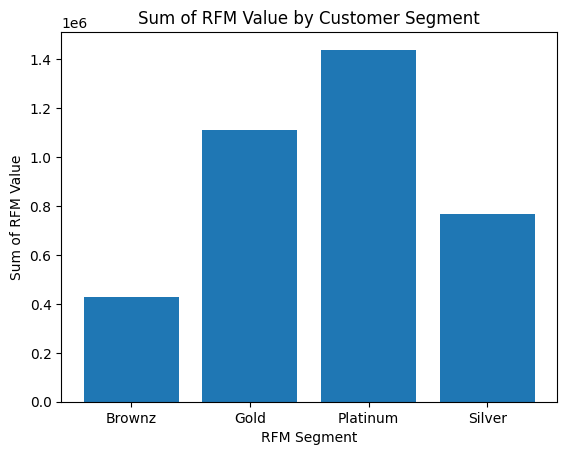

In [21]:
plt.bar(segment_sum.index, segment_sum.values)
plt.xlabel('RFM Segment')
plt.ylabel('Sum of RFM Value')
plt.title('Sum of RFM Value by Customer Segment')
plt.show()

In [22]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70 ,80 ,float('inf')]
age_labels = ['<20', '20-27', '28-37', '37-47', '48-57','57-67','67-77', '77-87', '87+']
data['Age Category'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

In [23]:
segment_age_pivot = data.pivot_table(index='Age Category', columns='wealth_segment', values='Profit', aggfunc='sum')

In [24]:
segment_age_pivot

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
Age Category,,,
<20,0.00,0.00,0.00
20-27,0.00,0.00,0.00
28-37,311157.25,255451.72,547052.80
37-47,315945.19,387516.00,617538.90
48-57,640318.51,647112.50,1352340.13
57-67,352746.72,339253.45,670066.66
67-77,255060.67,259180.22,559344.34
77-87,2596.17,4523.23,0.00
87+,7212.17,0.00,1245.27


Text(0, 0.5, 'Profit')

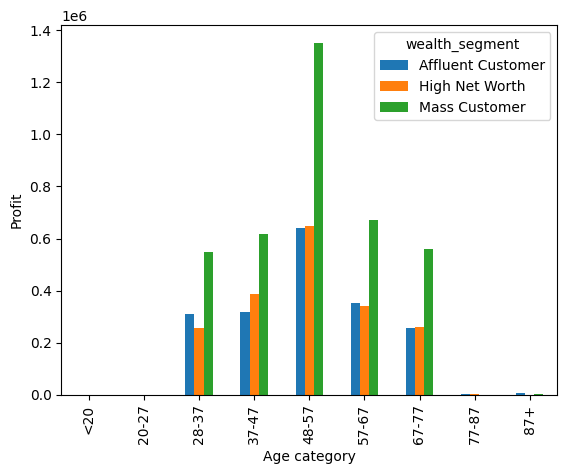

In [25]:
segment_age_pivot.plot(kind='bar')
plt.xlabel("Age category")
plt.ylabel("Profit")

In [26]:
segment_car_pivot = data.pivot_table(index=pd.Series(data['owns_car']), columns='state', values='owns_car', aggfunc= 'count')
segment_car_pivot

state,NSW,QLD,VIC
owns_car,,,
No,3531,1483,1713
Yes,3680,1522,1699


Text(0, 0.5, 'Number of cars')

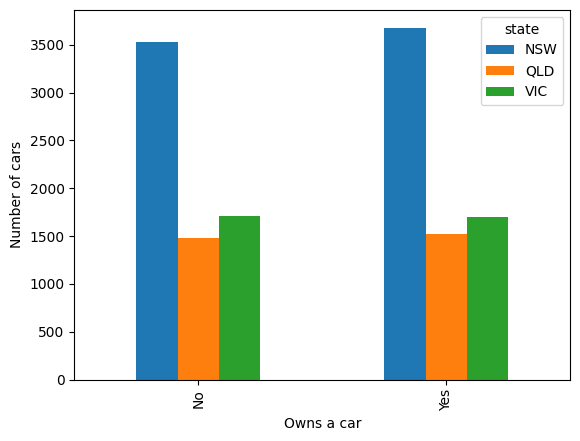

In [27]:
segment_car_pivot.plot(kind='bar')
plt.xlabel("Owns a car")
plt.ylabel("Number of cars")

In [28]:
segment_purchase_pivot = data.pivot_table(index='job_industry_category', values='past_3_years_bike_related_purchases', aggfunc='sum')

Text(0, 0.5, 'Number of bikes past 3 years ')

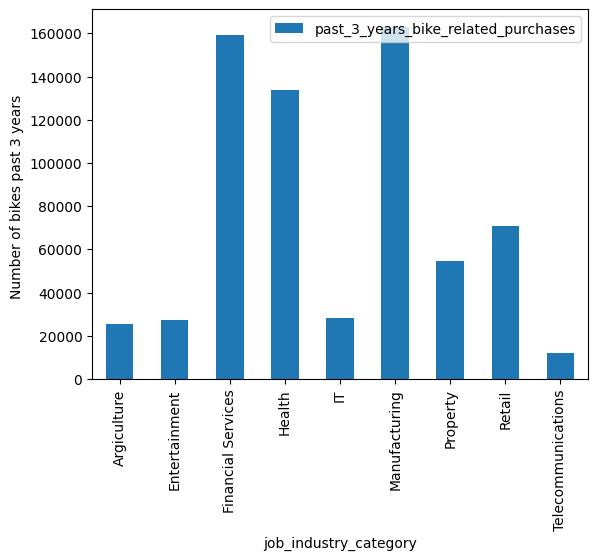

In [29]:
segment_purchase_pivot.plot(kind='bar')
plt.ylabel("Number of bikes past 3 years ")

In [30]:
segment_industry_profit_pivot = data.pivot_table(index='job_industry_category', values='Profit', aggfunc='sum')
segment_industry_profit_pivot

,Profit
job_industry_category,
Argiculture,255212.87
Entertainment,326459.13
Financial Services,1840374.01
Health,1429215.25
IT,313201.16
Manufacturing,1810040.41
Property,596263.31
Retail,798644.56
Telecommunications,156251.20


Text(0.5, 0, 'Profit')

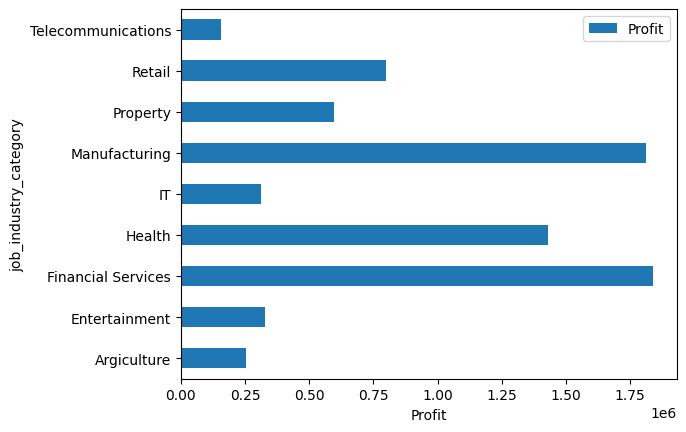

In [31]:
segment_industry_profit_pivot.plot(kind='barh')
#plt.barh(segment_industry_profit_pivot.index, segment_industry_profit_pivot.values )
plt.xlabel("Profit")

In [32]:
segment_gender_pivot = data.pivot_table(index='gender', values='past_3_years_bike_related_purchases', aggfunc='sum')
segment_gender_pivot

,past_3_years_bike_related_purchases
gender,
F,339649
M,334875


In [33]:
segment_age_gender_pivot = data.pivot_table(index='gender', columns='wealth_segment', values='Profit', aggfunc='sum')
segment_age_gender_pivot

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
gender,,,
F,922232.51,964787.20,1922997.18
M,962804.17,928249.92,1824590.92


In [34]:
top_10_customers = data.nlargest(10, 'Profit')

In [35]:
top_1_past_3year_customers = data.nlargest(1, 'past_3_years_bike_related_purchases')
top_1_past_3year_customers[['first_name', 'last_name',  'Profit','past_3_years_bike_related_purchases']]

,first_name,last_name,Profit,past_3_years_bike_related_purchases
584,Garald,Pidler,834.94,99


In [36]:
top_10_customers[['first_name', 'last_name',  'Profit','past_3_years_bike_related_purchases', 'Customer_segment','wealth_segment','property_valuation', 'product_class' ]]

,first_name,last_name,Profit,past_3_years_bike_related_purchases,Customer_segment,wealth_segment,property_valuation,product_class
3,Lauree,O'Donnell,1702.55,89,Gold,Mass Customer,5,medium
13,Berne,Donegan,1702.55,9,Platinum,Affluent Customer,1,medium
93,Kristal,Joysey,1702.55,62,Silver,High Net Worth,4,medium
99,Merv,Barradell,1702.55,56,Brownz,Mass Customer,8,medium
145,Winna,Verny,1702.55,55,Silver,High Net Worth,12,medium
164,Tanya,Boddis,1702.55,7,Brownz,Affluent Customer,8,medium
169,Cindelyn,Balas,1702.55,2,Brownz,Mass Customer,3,medium
224,Aldon,Roelofs,1702.55,61,Silver,Mass Customer,10,medium
249,Mike,Geggus,1702.55,12,Gold,Mass Customer,9,medium
264,Lucy,Lackmann,1702.55,35,Gold,Mass Customer,9,medium


In [37]:
top_10_customers_rfm = data.nlargest(10, ['RFM_value','Profit'])
top_10_customers_rfm[['first_name', 'last_name',  'Profit','past_3_years_bike_related_purchases', 'Customer_segment','wealth_segment','property_valuation', 'product_class' ]]

,first_name,last_name,Profit,past_3_years_bike_related_purchases,Customer_segment,wealth_segment,property_valuation,product_class
333,Woody,Dowthwaite,1702.55,9,Platinum,Mass Customer,4,medium
816,Jeffry,Slowly,1702.55,93,Platinum,Affluent Customer,10,medium
1484,Kynthia,Purcer,1702.55,22,Platinum,Affluent Customer,9,medium
1815,Grove,Peltzer,1702.55,48,Platinum,Mass Customer,10,medium
1969,Tye,Doohan,1702.55,13,Platinum,Affluent Customer,8,medium
2487,Constancia,Akram,1702.55,17,Platinum,Mass Customer,9,medium
2979,Harmon,Bakster,1702.55,46,Platinum,High Net Worth,3,medium
3528,Erastus,Payley,1702.55,96,Platinum,Mass Customer,2,medium
3598,Brita,Plant,1702.55,2,Platinum,Mass Customer,8,medium
5267,Ebba,Hanselmann,1702.55,99,Platinum,Affluent Customer,8,medium


In [38]:
top_10_customers_rfm_3year = data.nlargest(10, ['RFM_value','Profit', 'past_3_years_bike_related_purchases'])
top_10_customers_rfm_3year[['first_name', 'last_name',  'Profit','past_3_years_bike_related_purchases','RFM_value', 'Customer_segment','wealth_segment','property_valuation', 'product_class', 'state' ]]

,first_name,last_name,Profit,past_3_years_bike_related_purchases,RFM_value,Customer_segment,wealth_segment,property_valuation,product_class,state
5267,Ebba,Hanselmann,1702.55,99,444,Platinum,Affluent Customer,8,medium,NSW
3528,Erastus,Payley,1702.55,96,444,Platinum,Mass Customer,2,medium,QLD
816,Jeffry,Slowly,1702.55,93,444,Platinum,Affluent Customer,10,medium,NSW
8497,Gene,Brome,1702.55,81,444,Platinum,Mass Customer,8,medium,NSW
12728,Waylin,Eassom,1702.55,69,444,Platinum,High Net Worth,1,medium,VIC
1815,Grove,Peltzer,1702.55,48,444,Platinum,Mass Customer,10,medium,NSW
2979,Harmon,Bakster,1702.55,46,444,Platinum,High Net Worth,3,medium,NSW
5814,Huberto,Bazylets,1702.55,27,444,Platinum,Mass Customer,12,medium,NSW
1484,Kynthia,Purcer,1702.55,22,444,Platinum,Affluent Customer,9,medium,VIC
2487,Constancia,Akram,1702.55,17,444,Platinum,Mass Customer,9,medium,VIC


In [39]:
segment_car_profit_pivot = data.pivot_table(index='owns_car', values='Profit', aggfunc= 'sum')
segment_car_profit_pivot

,Profit
owns_car,
No,3665405.18
Yes,3860256.72


<Axes: ylabel='owns_car'>

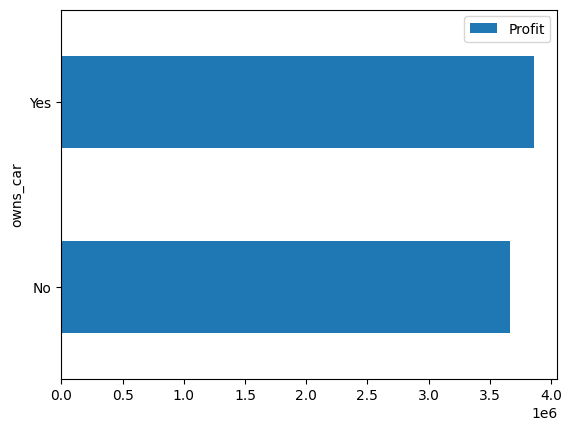

In [40]:
segment_car_profit_pivot.plot(kind='barh')

In [41]:
segment = data.pivot_table(index='Customer_segment', columns='state', values= 'Profit', aggfunc='sum')
segment

state,NSW,QLD,VIC
Customer_segment,,,
Brownz,998231.88,419888.84,463727.75
Gold,974574.91,432165.46,487254.27
Platinum,1005492.48,391319.95,457701.64
Silver,989766.59,416830.34,488707.79


<Axes: xlabel='Customer_segment'>

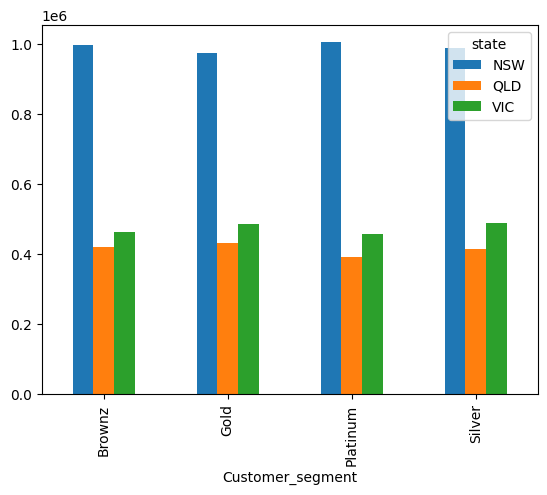

In [42]:
segment.plot(kind='bar')

In [48]:
segment = data.pivot_table(index='Customer_segment', values= 'past_3_years_bike_related_purchases', aggfunc='count')
segment

,past_3_years_bike_related_purchases
Customer_segment,
Brownz,3417
Gold,3416
Platinum,3383
Silver,3412


<Axes: xlabel='Customer_segment'>

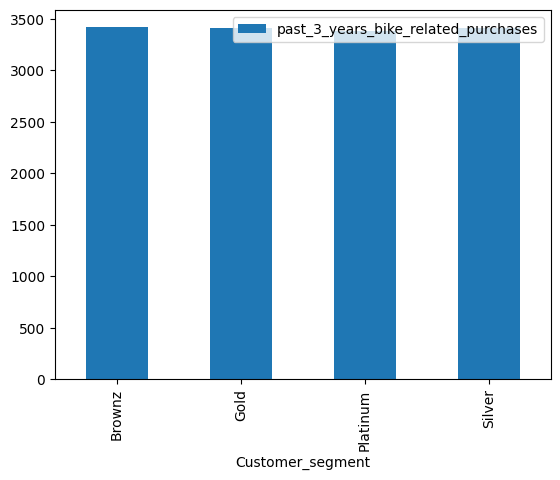

In [49]:
segment.plot(kind='bar')

In [57]:
segment = data.pivot_table(index='wealth_segment',values= 'tenure', aggfunc='sum')
segment

,tenure
wealth_segment,
Affluent Customer,35841
High Net Worth,37956
Mass Customer,72558


<Axes: xlabel='wealth_segment'>

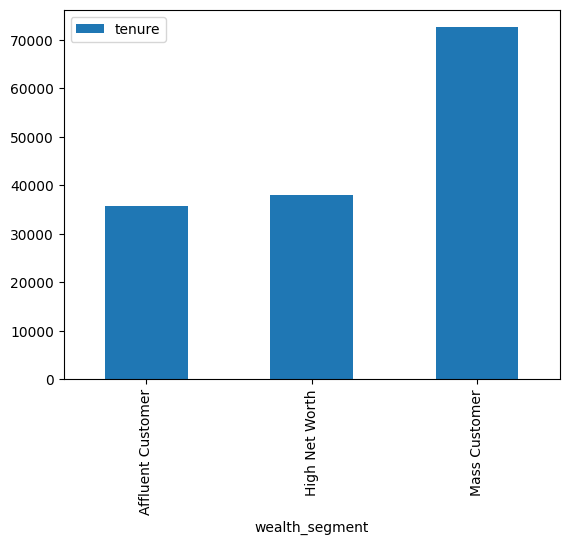

In [58]:
segment.plot(kind='bar')

In [61]:
data['property_valuation'].max()

12

<Axes: ylabel='Density'>

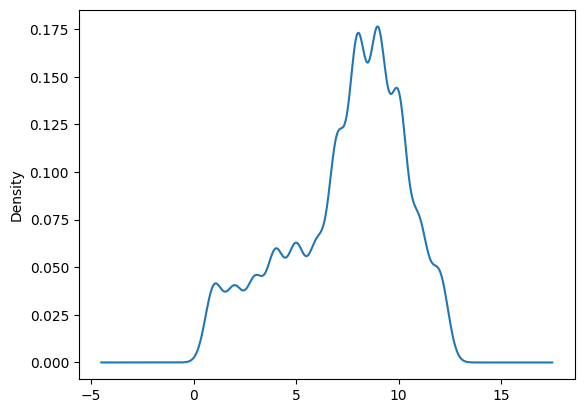

In [59]:
data['property_valuation'].plot(kind='density')

In [66]:
property_bins = [0, 5, 10, float('inf')]
property_labels = ['<5 Low value', '5-10 MID value', '10-15 High Value']
data['Property_Category'] = pd.cut(data['property_valuation'], bins=property_bins, labels=property_labels)

In [70]:
segment_age_pivot = data.pivot_table(index='Property_Category', columns='Customer_segment', values='Profit', aggfunc='sum')
segment_age_pivot

Customer_segment,Brownz,Gold,Platinum,Silver
Property_Category,,,,
<5 Low value,464003.67,454871.03,463679.77,435398.23
5-10 MID value,1193676.08,1210778.43,1185406.26,1239170.28
10-15 High Value,224168.72,228345.18,205428.04,220736.21


<Axes: xlabel='Property_Category'>

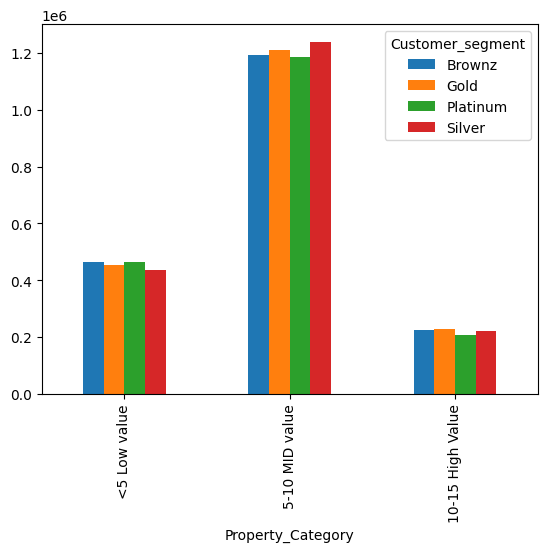

In [71]:
segment_age_pivot.plot(kind='bar')

<Axes: xlabel='Property_Category'>

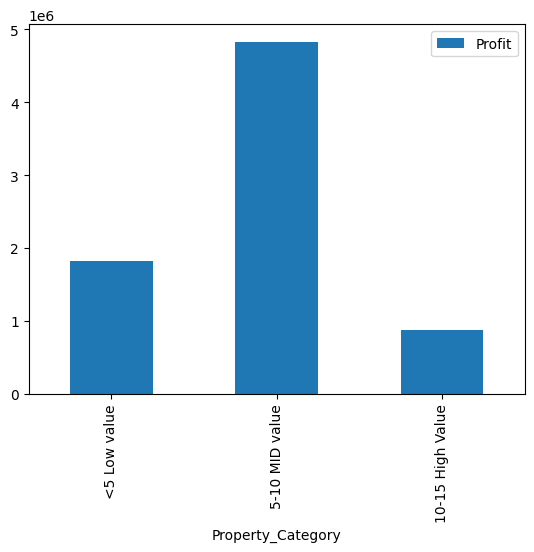

In [69]:
segment_age_pivot.plot(kind='bar')

In [74]:
data['tenure'].max()

22

<Axes: ylabel='Density'>

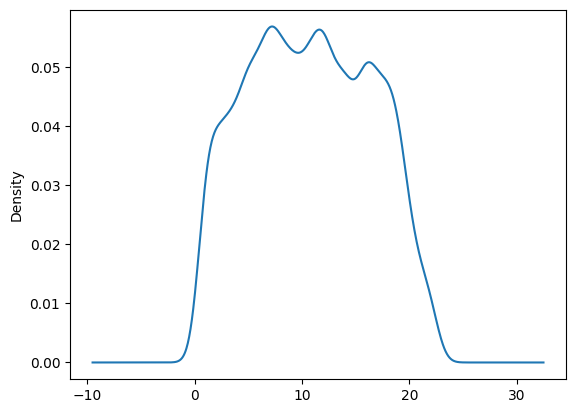

In [72]:
data['tenure'].plot(kind='density')

In [67]:
data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Profit', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'recency', 'Frequency', 'MonetaryValue',
       'R_score', 'F_score', 'M_score', 'RFM_value', 'RFM_score',
       'Customer_segment', 'Age Category', 'Property_Category'],
      dtype='object')

In [78]:
tenure_bins = [0, 10, 20,  float('inf')]
tenure_bins_labels = ['<10', '11-20', '>20']
data['tenure_category'] = pd.cut(data['tenure'], bins=tenure_bins, labels=tenure_bins_labels)

In [79]:
segment_tenure_pivot = data.pivot_table(index='tenure_category', columns='Customer_segment', values='Profit', aggfunc='sum')
segment_tenure_pivot

Customer_segment,Brownz,Gold,Platinum,Silver
tenure_category,,,,
<10,917048.99,918728.89,884323.50,896254.32
11-20,895109.17,912054.44,919598.83,944528.92
>20,69690.31,63211.31,50591.74,54521.48


<Axes: xlabel='tenure_category'>

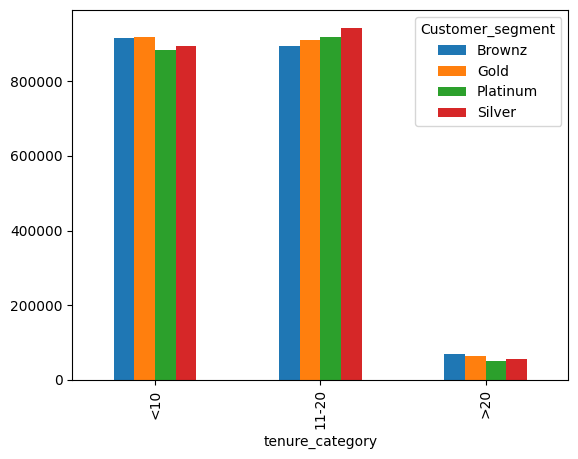

In [80]:
segment_tenure_pivot.plot(kind='bar')